# 최대 우도 추정 

- GMM(Generalized Method of Moments)
- MLE(Maximum Likelihood Estimation). 실제로 많이 쓰는 방법
- Bayesian Estimation. 이것도 많이 쓰는 방법
- MAP(Maximum Posteriori)
- MCMC(Markov chain Monte Carlo). 데이터를 계속해서 생성하는 방법. 계산을 무지하게 많이 하는 방법. 코스에서는 다루지 않는다.
- MLE를 다시 한번 해보겠다. N개일 때 수식을 쓸 것이다.

최대우도추정(MLE:Maximum Likelihood Estimation) 방법은 확률 모형의 모수 추정에서 가장 일반적으로 사용되는 방법이다. 

## 우도(Likelihood)

확률 변수 $X$에 대한 확률 모형은 확률 밀도 함수 $f_X$에 의해 정의된다. 확률 밀도 함수는 일반적으로 $f_X(x;\theta)$와 같은 형태를 가진다. 여기에서 $x$는 확률 변수가 가질 수 있는 실수값이고 $\theta$는 확률 밀도 함수 즉, 확률 모형의 모수(parameter) 집합을 대표하는 기호이다.

예를 들어 가우시안 확률 변수 $X$의 확률 밀도 함수는 다음과 같은 형태를 가진다. 이 식에서 $\theta = (\mu, \sigma^2)$ 이다.

$$ f_X (x; \theta) = f_X (x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(x-\mu)^2}{2\sigma^2}}\right) $$

함수의 관점에서 일반적으로 $\theta$는 고정된 값, 즉 상수 계수이고 $x$를 변수(variable)로 가정한다. 즉, 이미 확률 변수 모형은 고정되어 있고 주어진 실수 입력값에 대해 그 실수값이 나올 상대적 가능성을 출력하는 것이 $x$를 변수로 가지는 확률 밀도 함수이다.

그러나 반대로 추정 문제에서는 $x$ 즉, 이미 실현된 샘플값은 알고 있지만 모수 $\theta$를 모르고 있다. 이 경우에는 확률 밀도 함수라는 수식에서 $x$를 이미 결정되어 버린 상수 계수로 놓고 $\theta$를 찾아내야 할 변수로 생각할 수 있다. 물론 $f_X(x, \theta)$의 의미 자체는 변함없이 
주어진 $x$가 나올 수 있는 상대적 가능성의 값이다. 이를 우도(likelihood)라고 한다. 우도를 표기할 때는 $\theta$의 함수임을 명확하게 하기 위해 다음과 같이 기호의 순서를 바꾼다.

$$ \mathcal{L}(\theta;x) = f_X(x \vert \theta) $$

* 우도(likelihood)

 * 확률 밀도 함수를 랜덤변수의 값 $x$의 함수가 아닌 파라미터 $\theta$의 함수로 보는 것
 * 확률 분포로부터 특정한 샘플 값 $x$가 발생하였을 때, 이 샘플 값  $x$가 나오게 하는 파라미터 $\theta$의 가능성
 * 확률 분포로부터 특정한 샘플 값 $x$가 발생하였을 때, 샘플 값  $x$와 변수 $\theta$에서의는 확률(밀도함수)


* 확률 밀도 함수 $f_X(x; \theta) $
 * $\theta$ 값을 이미 알고 있음
 * $\theta$는 상수, $x$는 변수
 * $\theta$가 이미 정해져 있는 상황에서의 $x$ 값의 상대적 가능성


* Likelihood $L(\theta) = f_X(x|\theta)$
 * $x$가 이미 발생. 값을 이미 알고 있음
 * $x$는 상수, $\theta$는 변수
 * $x$가 이미 정해져 있는 상황에서의 $\theta$ 값의 상대적 가능성



## 최대 우도 추정 (MLE)

최대 우도 추정(MLE: Maximum Likelihood Estimation) 방법은 주어진 샘플 $x$에 대해 우도를 가장 크게 해 주는 모수 $\theta$를 찾는 방법이다.

예를 들어 정규 분포를 가지는 확률 변수의 분산 $\sigma^2=1$은 알고 있으나 평균 $\mu$를 모르고 있어 이를 추정해야 하는 문제를 생각해 보자.

이 때 이 확률 변수의 샘플 하나 $x_0=1$를 가지고 있다. 이 $x_0$ 값에서 어떤 $\mu$ 값이 가장 가능성(우도: likelihood)이 있어보는가? 다음 그림에는 $\mu=-1$, $\mu=0$, $\mu=1$,세가지 후보를 제시한다. 이 세가지 $\mu$ 값에 대해 $x_0$이 나올 확률이 바로 우도이다. 그림에서 볼 수 있듯이 $\mu=1$일 경우의 우도가 가장 크다. 따라서 최대 우도 추정법에 의한 추정값은 $\hat\mu_{\text{MLE}}=1$이다.

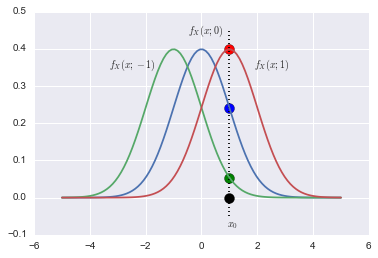

In [1]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sp.stats.norm(loc=0).pdf(x))
plt.hold(True)
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.05, 0.45, linestyle=":")
plt.text(1-0.09, -0.08, "$x_0$")
plt.plot(x, sp.stats.norm(loc=-1).pdf(x))
plt.plot(x, sp.stats.norm(loc=1).pdf(x))
plt.scatter(1, sp.stats.norm(loc=-1).pdf(1), s=100, c='g');
plt.scatter(1, sp.stats.norm(loc=0).pdf(1), s=100, c='b');
plt.scatter(1, sp.stats.norm(loc=1).pdf(1), s=100, c='r');
plt.text(-3.3, 0.35, "$f_X(x;-1)$")
plt.text(-0.5, 0.44, "$f_X(x;0)$")
plt.text(1.9, 0.35, "$f_X(x;1)$");

일반적으로는 추정을 위해 확보하고 있는 확률 변수 샘플의 수가 하나가 아니라 복수 $x_1, x_2, \cdots x_N$이므로 우도는 이 샘플값에 대한 결합 확률 밀도 $f_{X_1, X_2, \cdots, X_N}(x_1, x_2, \cdots, x_N ; \theta)$ 에서 구해야 한다.

## 최대 우도 추정의 구현

실제로 최대 우도 추정 방법을 사용하려면 우도가 최대가 되는 $\theta$를 수치적으로 계산해야 한다. 즉 수치적 최적화(numerical optimization) 문제가 된다.

$$ \hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; \{x_i\}) $$

또한 우도를 직접 사용하는 것이 아니라 우도를 로그변환한 로그 우도(Log likelihood)함수 $\mathcal{LL} = \log{\mathcal{L}}$를 사용한다. 샘플의 수가 복수인 경우 결합 확률 밀도 함수 즉 우도 함수가 동일한 함수의 곱으로 나타나는 경우가 많은데 이 때 로그 변환에 의해 곱셈이 덧셈으로 변하여 계산이 용이해지기 때문이다.